In [1]:
import numpy as np
import pandas as pd

In [8]:
!pip install gensim

In [24]:
import gensim
import os

In [25]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

story = []
for filename in os.listdir('datagot'):
    
    f = open(os.path.join('datagot',filename))
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))
    

In [26]:
story

[['game',
  'of',
  'thrones',
  'book',
  'one',
  'of',
  'song',
  'of',
  'ice',
  'and',
  'fire',
  'by',
  'george',
  'martin',
  'prologue',
  'we',
  'should',
  'start',
  'back',
  'gared',
  'urged',
  'as',
  'the',
  'woods',
  'began',
  'to',
  'grow',
  'dark',
  'around',
  'them'],
 ['the', 'wildlings', 'are', 'dead'],
 ['do', 'the', 'dead', 'frighten', 'you'],
 ['ser',
  'waymar',
  'royce',
  'asked',
  'with',
  'just',
  'the',
  'hint',
  'of',
  'smile'],
 ['gared', 'did', 'not', 'rise', 'to', 'the', 'bait'],
 ['he',
  'was',
  'an',
  'old',
  'man',
  'past',
  'fifty',
  'and',
  'he',
  'had',
  'seen',
  'the',
  'lordlings',
  'come',
  'and',
  'go'],
 ['dead', 'is', 'dead', 'he', 'said'],
 ['we', 'have', 'no', 'business', 'with', 'the', 'dead'],
 ['are', 'they', 'dead'],
 ['royce', 'asked', 'softly'],
 ['what', 'proof', 'have', 'we'],
 ['will', 'saw', 'them', 'gared', 'said'],
 ['if',
  'he',
  'says',
  'they',
  'are',
  'dead',
  'that',
  'proof',


In [27]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [28]:
model.build_vocab(story)

In [29]:
model.train(story, total_examples=model.corpus_count, epochs=5)

(6569969, 8628190)

In [30]:
model.wv.most_similar('daenerys')

[('stormborn', 0.8060332536697388),
 ('targaryen', 0.7324605584144592),
 ('princess', 0.7324479818344116),
 ('unburnt', 0.7283498644828796),
 ('myrcella', 0.7147807478904724),
 ('queen', 0.6746848225593567),
 ('margaery', 0.674332857131958),
 ('elia', 0.6740904450416565),
 ('doran', 0.6731381416320801),
 ('dorne', 0.6570569276809692)]

In [9]:
model.wv.doesnt_match(['jon','rikon','robb','arya','sansa','bran'])

'jon'

In [10]:
model.wv.doesnt_match(['cersei', 'jaime', 'bronn', 'tyrion'])

'bronn'

In [11]:
model.wv['king']

array([ 1.7333236 ,  0.62775564,  2.4680543 ,  0.640996  , -0.85515136,
        0.35843012,  1.1743951 ,  1.1790204 , -2.8003626 ,  0.81208116,
       -2.5191302 , -0.61898327,  0.08007657,  0.96938485, -2.5211537 ,
       -2.1170669 ,  0.79761416,  2.407689  ,  1.2830293 ,  0.93126106,
        1.0553666 , -1.2700518 ,  1.6677321 , -4.004745  , -1.5652508 ,
        1.6236318 , -1.1308455 , -1.5891873 , -0.03826169,  1.1549206 ,
       -2.3778703 ,  1.015861  ,  1.142676  , -1.6188527 ,  2.2072918 ,
       -4.252971  , -3.5224156 , -0.03523605,  0.94000447, -2.0210824 ,
       -0.04627841,  3.1321568 ,  1.4488378 , -0.86916125, -1.1990899 ,
       -0.46974328,  1.663158  , -1.8645427 ,  1.6737858 , -1.4991806 ,
       -4.00208   , -1.4362463 , -2.4563181 , -3.2695088 ,  3.4717884 ,
       -2.5183787 , -0.97161394,  0.7376927 ,  0.03670334,  0.4062522 ,
        0.84317666,  2.465371  , -1.3647972 , -1.5387428 ,  0.6960411 ,
        1.8895826 , -0.53872246, -0.42052215, -0.89356464, -1.55

In [12]:
model.wv.similarity('arya','sansa')

0.8392945

In [13]:
model.wv.similarity('cersei','sansa')

0.7429299

In [14]:
model.wv.similarity('tywin','sansa')

0.27407724

In [15]:
model.wv.get_normed_vectors()

array([[-0.06452727, -0.14639755,  0.11949067, ..., -0.12087917,
        -0.02986226,  0.01444069],
       [-0.10350241, -0.23214857,  0.04637458, ..., -0.16965234,
         0.042876  ,  0.09343502],
       [ 0.19028011, -0.05148442, -0.06424832, ...,  0.02550135,
         0.1370436 , -0.04541045],
       ...,
       [ 0.04843055,  0.13437404, -0.03407599, ..., -0.09248232,
         0.19994187, -0.13538721],
       [-0.03134216, -0.06306325,  0.10625184, ...,  0.00468   ,
         0.10361611, -0.04188288],
       [-0.04590794,  0.06427108,  0.09856323, ..., -0.02909508,
         0.07131449, -0.05672767]], dtype=float32)

In [16]:
y = model.wv.index_to_key

In [17]:
y

['the',
 'and',
 'to',
 'of',
 'he',
 'his',
 'was',
 'you',
 'her',
 'in',
 'it',
 'had',
 'that',
 'she',
 'as',
 'with',
 'him',
 'not',
 'but',
 'for',
 'they',
 'is',
 'at',
 'on',
 'said',
 'my',
 'have',
 'be',
 'lord',
 'them',
 'no',
 'from',
 'would',
 'were',
 'me',
 'your',
 'one',
 'all',
 'when',
 'will',
 'ser',
 'if',
 'so',
 'their',
 'we',
 'could',
 'are',
 'man',
 'there',
 'this',
 'up',
 'been',
 'what',
 'did',
 'by',
 'king',
 'do',
 'men',
 'back',
 'out',
 'more',
 'or',
 'who',
 'down',
 'well',
 'than',
 'only',
 'like',
 'jon',
 'some',
 'father',
 'old',
 'hand',
 'even',
 'too',
 'tyrion',
 'before',
 'never',
 'an',
 'off',
 'see',
 'know',
 'into',
 'made',
 'now',
 'eyes',
 'black',
 'told',
 'lady',
 'thought',
 'time',
 'then',
 'how',
 'long',
 'has',
 'can',
 'might',
 'us',
 'come',
 'where',
 'here',
 'through',
 'still',
 'face',
 'head',
 'red',
 'll',
 'way',
 'boy',
 'page',
 'must',
 'once',
 'queen',
 'good',
 'two',
 'brother',
 'night',
 

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=3)

In [20]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [21]:
X.shape

(17453, 3)

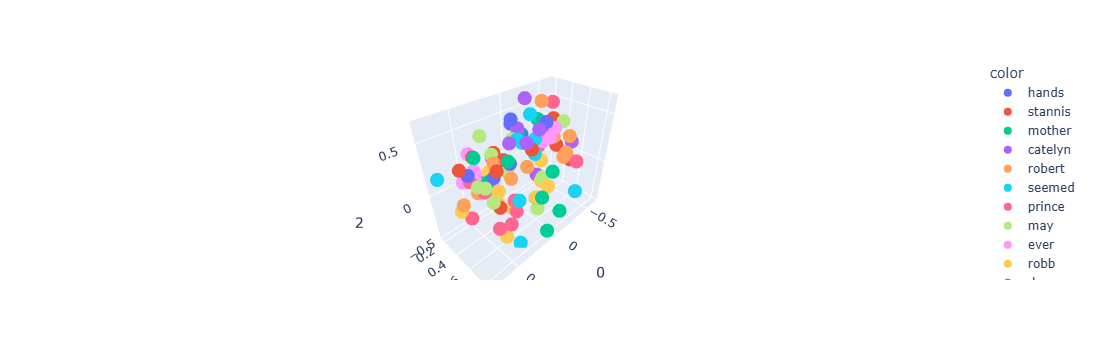

In [23]:
import plotly.express as px
fig = px.scatter_3d(X[200:300],x=0,y=1,z=2, color=y[200:300])
fig.show()